# **Identification des maladies des plantes et des anomalies foliaires avec CNN**

In [ ]:
!pip install -q kaggle

In [ ]:
! pip install tensorflow-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.
tensorflow 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.19.0 which is incompatible.


In [ ]:
! pip install ml-dtypes==0.4.0
! pip install tensorboard==2.18.0

In [ ]:
! pip install tensorflow==2.18.0 --force-reinstall --upgrade --no-deps
! pip install ml-dtypes==0.4.0 tensorboard==2.18.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 888.6 kB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 98.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.1
    Uninstalling ml_dtypes-0.5.1:
      Successfully uninstalled ml_dtypes-0.5.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-cpu 2.19.0 requires ml-dtypes<1.0.0,>=0.5.1, but you have ml-dtypes 0

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hamratourmine","key":"8c61964be6ff2d38389e1187d32db9bf"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!/bin/bash
! kaggle datasets download abhifyp2025/data-for-identification-of-plant-leaf

Dataset URL: https://www.kaggle.com/datasets/abhifyp2025/data-for-identification-of-plant-leaf
License(s): unknown


In [ ]:
! unzip data-for-identification-of-plant-leaf.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data for Identification of Plant Leaf Diseases Using a 9-layer Deep Convolutional Neural Network/Plant_leaf_diseases_dataset_without_augmentation/Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (3088).JPG  
  inflating: Data for Identification of Plant Leaf Diseases Using a 9-layer Deep Convolutional Neural Network/Plant_leaf_diseases_dataset_without_augmentation/Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (3089).JPG  
  inflating: Data for Identification of Plant Leaf Diseases Using a 9-layer Deep Convolutional Neural Network/Plant_leaf_diseases_dataset_without_augmentation/Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (309).JPG  
  inflating: Data for Identification of Plant Leaf Diseases Using a 9-layer Deep Convolutional Neural Network/Plant_leaf_diseases_dataset_without_aug

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os
import matplotlib.pyplot as plt

In [ ]:
dataset_path = "/content/Data for Identification of Plant Leaf Diseases Using a 9-layer Deep Convolutional Neural Network/Plant_leaf_diseases_dataset_with_augmentation/Plant_leave_diseases_dataset_with_augmentation"


In [ ]:
# Parameters
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 15
FINE_TUNE_EPOCHS = 5
SEED = 123

In [ ]:
# Charger 90% des données (train + val)
full_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.1,
    subset="training",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# Charger 10% des données pour le test
test_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.1,
    subset="validation",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

# Calcul du nombre de batches dans full_ds
full_ds_size = len(full_ds)
train_size = 0.8

# Séparer train et validation datasets
train_batches = int(train_size * full_ds_size)

train_ds = full_ds.take(train_batches)
val_ds = full_ds.skip(train_batches)

# Afficher les tailles
print(f"Full dataset batches: {full_ds_size}")
print(f"Train batches: {len(train_ds)}")
print(f"Validation batches: {len(val_ds)}")
print(f"Test batches: {len(test_ds)}")


Found 61486 files belonging to 39 classes.
Using 55338 files for training.
Found 61486 files belonging to 39 classes.
Using 6148 files for validation.
Full dataset batches: 1730
Train batches: 1384
Validation batches: 346
Test batches: 193


In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
])

In [ ]:

# Optimisation du pipeline
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)


In [ ]:
# === PRÉPARATION DU MODÈLE ===
n_classes = len(os.listdir(dataset_path))
base_model = MobileNetV2(
    input_shape=IMAGE_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

In [ ]:
# === CONSTRUCTION DU MODÈLE ===
inputs = tf.keras.Input(shape=IMAGE_SIZE + (3,))
x = data_augmentation(inputs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(n_classes, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
# === COMPILATION ===
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# === ENTRAÎNEMENT INITIAL ===
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)

Epoch 1/15
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 857s 614ms/step - accuracy: 0.7057 - loss: 1.1034 - val_accuracy: 0.9140 - val_loss: 0.2903
Epoch 2/15
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 858s 620ms/step - accuracy: 0.8979 - loss: 0.3247 - val_accuracy: 0.9268 - val_loss: 0.2407
Epoch 3/15
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 824s 592ms/step - accuracy: 0.9108 - loss: 0.2808 - val_accuracy: 0.9330 - val_loss: 0.2144
Epoch 4/15
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 818s 591ms/step - accuracy: 0.9161 - loss: 0.2628 - val_accuracy: 0.9338 - val_loss: 0.2102
Epoch 5/15
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 803s 580ms/step - accuracy: 0.9170 - loss: 0.2496 - val_accuracy: 0.9335 - val_loss: 0.2060
Epoch 6/15
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 846s 611ms/step - accuracy: 0.9212 - loss: 0.2458 - val_accuracy: 0.9379 - val_loss: 0.1938
Epoch 7/15
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 803s 580ms/step - accuracy: 0.9215 - loss: 0.2438 - val_accuracy: 0.9430 - val_loss: 0.1831
Epoch 8/15
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 797s 576ms/step - ac

In [ ]:
# === ÉVALUATION SUR TEST SET (sans fine-tuning) ===
test_loss, test_acc = model.evaluate(test_ds)
print(f"✅ Test Accuracy (sans fine-tuning) : {test_acc:.2%}")


193/193 ━━━━━━━━━━━━━━━━━━━━ 78s 403ms/step - accuracy: 0.9342 - loss: 0.1954
✅ Test Accuracy (sans fine-tuning) : 93.61%


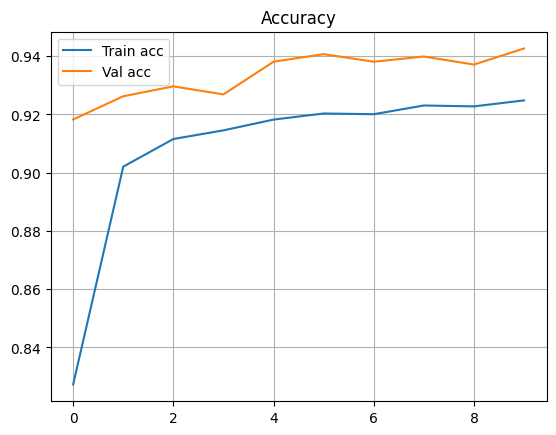

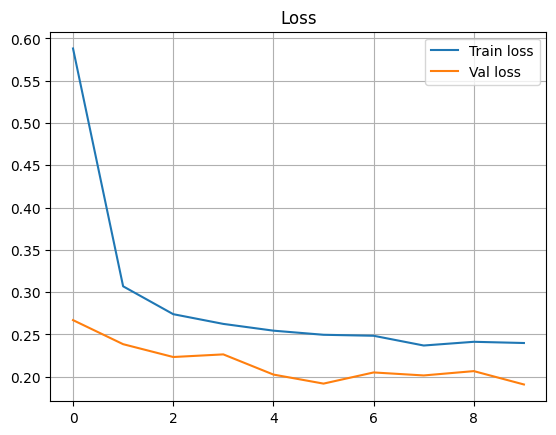

In [ ]:
# === COURBES ACCURACY / LOSS ===
plt.figure()
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.title('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.title('Loss')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

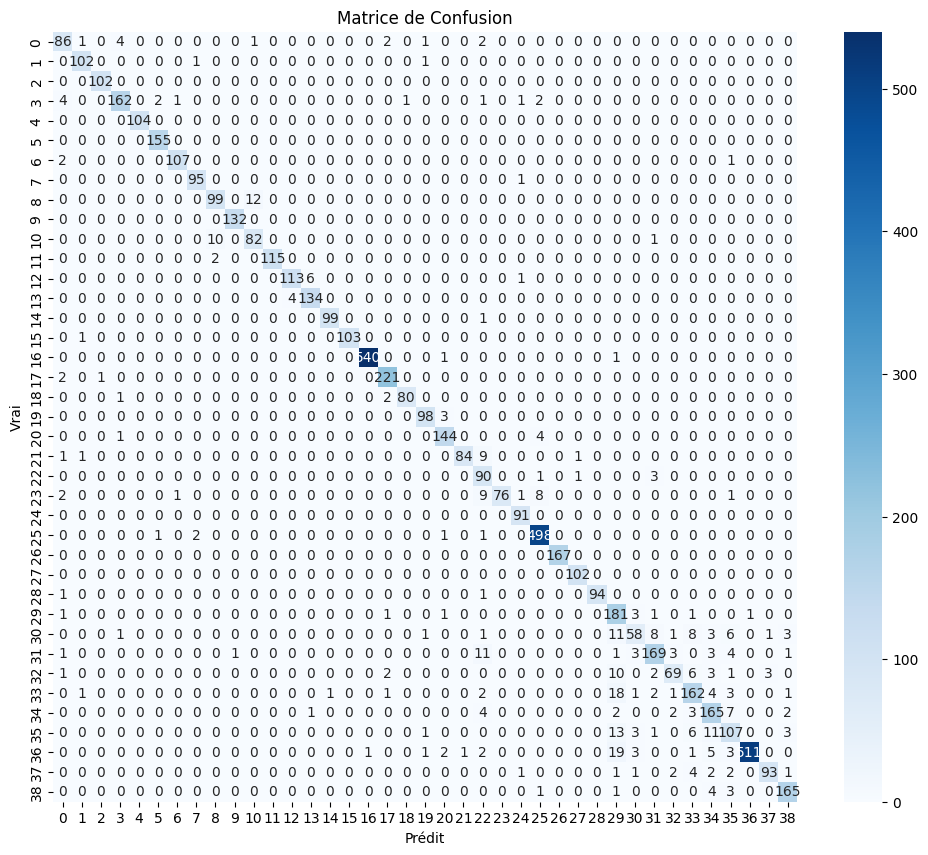


Classification Report :

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        97
           1       0.96      0.98      0.97       104
           2       0.99      1.00      1.00       102
           3       0.96      0.93      0.94       174
           4       1.00      1.00      1.00       104
           5       0.98      1.00      0.99       155
           6       0.98      0.97      0.98       110
           7       0.97      0.99      0.98        96
           8       0.89      0.89      0.89       111
           9       0.99      1.00      1.00       132
          10       0.86      0.88      0.87        93
          11       1.00      0.98      0.99       117
          12       0.97      0.94      0.95       120
          13       0.95      0.97      0.96       138
          14       0.99      0.99      0.99       100
          15       1.00      0.99      1.00       104
          16       1.00      1.00      1.00       542
 

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Prédictions sur le dataset de test
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    preds_labels = np.argmax(preds, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(preds_labels)

# Calcul de la matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.show()

# Rapport de classification
print("\nClassification Report :\n")
print(classification_report(y_true, y_pred))


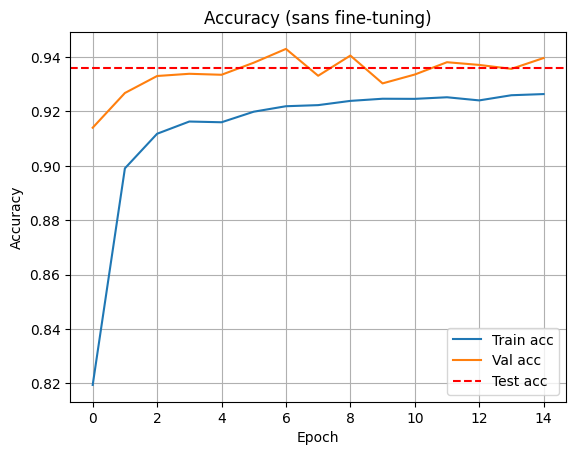

In [ ]:
# === COURBES ACCURACY ===
plt.figure()
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.axhline(y=test_acc, color='red', linestyle='--', label='Test acc')
plt.title('Accuracy (sans fine-tuning)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# === SAUVEGARDE MODÈLE (version sans fine-tuning) ===
model.save("mobelNetV2_39class_without_FineTuning.keras", save_format="keras")

In [ ]:
# === FINE-TUNING ===
base_model.trainable = True
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In [ ]:
fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS + FINE_TUNE_EPOCHS,
    initial_epoch=history.epoch[-1]
)

Epoch 15/20
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 2821s 2s/step - accuracy: 0.5142 - loss: 5.1748 - val_accuracy: 0.8490 - val_loss: 0.7542
Epoch 16/20
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 2753s 2s/step - accuracy: 0.8807 - loss: 0.4776 - val_accuracy: 0.8795 - val_loss: 0.5201
Epoch 17/20
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 2817s 2s/step - accuracy: 0.9146 - loss: 0.3123 - val_accuracy: 0.8956 - val_loss: 0.4096
Epoch 18/20
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 2751s 2s/step - accuracy: 0.9309 - loss: 0.2342 - val_accuracy: 0.9112 - val_loss: 0.3359
Epoch 19/20
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 2705s 2s/step - accuracy: 0.9420 - loss: 0.1867 - val_accuracy: 0.9225 - val_loss: 0.2875
Epoch 20/20
1384/1384 ━━━━━━━━━━━━━━━━━━━━ 2641s 2s/step - accuracy: 0.9520 - loss: 0.1481 - val_accuracy: 0.9276 - val_loss: 0.2511


In [ ]:
model.save("mobelNetV2_39class_with_FineTuning.keras",save_format="keras")

193/193 ━━━━━━━━━━━━━━━━━━━━ 72s 372ms/step - accuracy: 0.9263 - loss: 0.2574
Test Accuracy: 92.53%


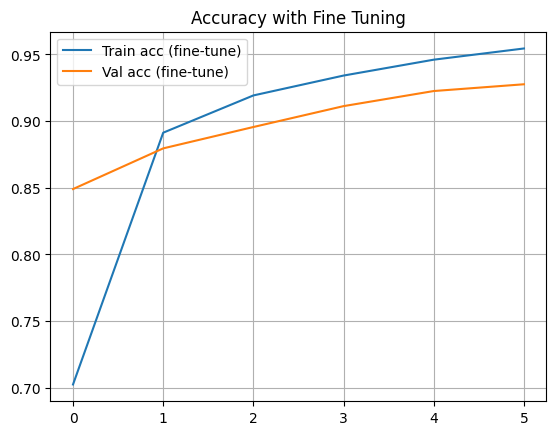

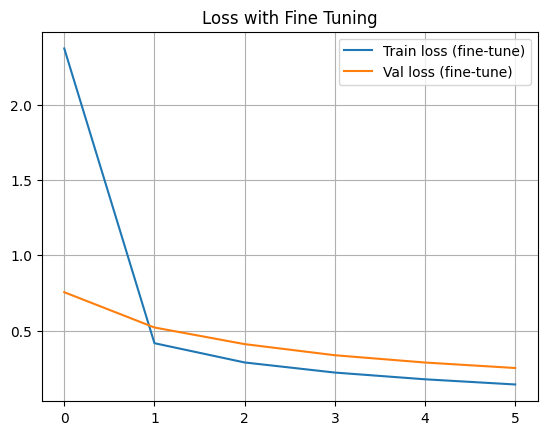

In [ ]:
# === TEST FINAL ===
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.2%}")

# Courbes après fine-tuning
plt.figure()
plt.plot(fine_tune_history.history['accuracy'], label='Train acc (fine-tune)')
plt.plot(fine_tune_history.history['val_accuracy'], label='Val acc (fine-tune)')
plt.title('Accuracy with Fine Tuning')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(fine_tune_history.history['loss'], label='Train loss (fine-tune)')
plt.plot(fine_tune_history.history['val_loss'], label='Val loss (fine-tune)')
plt.title('Loss with Fine Tuning')
plt.legend()
plt.grid(True)
plt.show()